In [39]:
import os
from PIL import Image
from torch.utils.data import Dataset
import numpy as np
from torch.utils.data import random_split, DataLoader

import albumentations as Alb
import sys
import os
import torch.nn as nn
from albumentations.pytorch import ToTensorV2
   
train_transform = Alb.Compose(
        [
            Alb.RandomRotate90(p=0.6),
            Alb.HorizontalFlip(p=0.6),
            Alb.VerticalFlip(p=0.6),
            Alb.ElasticTransform(p=0.5),
            Alb.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225],
                max_pixel_value=255.0
            ),
            ToTensorV2()
        ]
    )

In [40]:
from dataset import *
dataset = RoadCIL("training", training=True, transform=train_transform)

train_dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [41]:
for i in train_dataloader:
    pass

In [42]:
img, mask = i

In [43]:
img.shape

torch.Size([2, 3, 400, 400])

In [45]:
mask.shape

torch.Size([2, 400, 400])

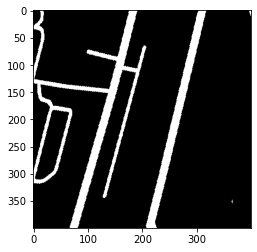

In [11]:
import matplotlib.pyplot as plt

plt.imshow(mask.numpy(), cmap='gray')

In [63]:
import torch
mask2= torch.roll(mask, shifts= (20,20), dims=(1,2))

In [64]:
mask.shape

torch.Size([2, 400, 400])

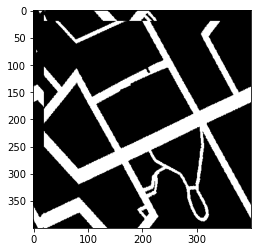

In [65]:
plt.imshow(mask2[0].numpy(), cmap='gray')

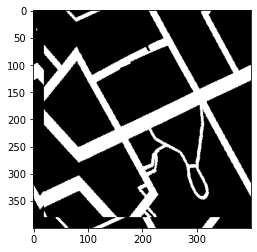

In [62]:
plt.imshow(mask2[0].numpy(), cmap='gray')

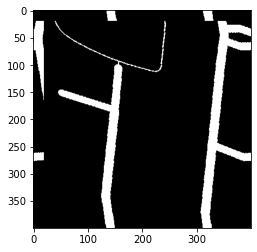

In [57]:
plt.imshow(mask2[1].numpy(), cmap='gray')

In [19]:
def border_check(mask, i, j, x, y):
    if mask[i][j]!=1:
        return 0
    is_border = 0
    for m in range(-1,2):
        for n in range(-1,2):
            if i+m<0 or i+m>=x-1 or j+n<0 or j+n>=y-1:
                continue
            if mask[i+m][j+n]==0:
                is_border = 1
            if is_border:
                return 1
    if is_border:
        return 1
    return 0

In [31]:
x,y = mask.shape
new_mask = np.zeros((x,y,3))
for i in range(x):
    for j in range(y):
        if mask[i][j]==0:
            new_mask[i,j,:] = np.array([0,0,0])
        else:
            if border_check(mask, i, j, x, y):
                new_mask[i,j,:] = np.array([255,0,0])
            else:
                new_mask[i,j,:] = np.array([255,255,255])
        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


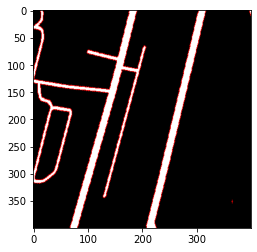

In [32]:
plt.imshow(new_mask)